# Exploratory Data Analysis: An Introduction

Exploratory Data Analysis (EDA) is a fundamental phase in the data science workflow. It is the process that involves understanding the structure of the data, identifying potential problems, and discovering insights through both visual and quantitative methods. The main objective of EDA is to uncover underlying patterns, spot anomalies, test a hypothesis, and check assumptions with the help of summary statistics and graphical representations.

## Dataset Overview

In the quest to build a robust machine learning model, our dataset for plant disease detection is built on the premise that both diversity and quantity of data are key to the model's effectiveness. To achieve this, we have combined several datasets to ensure a broad representation of images that capture a multitude of plant diseases in various environments. This strategy helps avoid biases that might occur with single-source data collections, such as overfitting to particular lighting conditions, backgrounds, or camera specifications.

The primary resource for our analysis is a comprehensive dataset that merges 14 distinct plant disease datasets, available on Kaggle, which originally consisted of 76,000 images spanning 88 classes. This includes well-known datasets such as PlantVillage and PlantDoc.

However, not all diseases are common, and to avoid model overfitting on rare instances, we pruned the dataset by removing classes that are underrepresented or insufficient in number. This step is crucial for maintaining a dataset that mirrors the actual distribution of plant diseases.

To further enrich our dataset, we included maize and tomato disease images from the CCMT dataset and apple disease data from the Plant Pathology 2020 Dataset. Additionally, we expanded our dataset with processed images from the PlantDoc dataset, where individual leaves were extracted from 2,500 images, leading to an approximate increase of 9,000 images.

## Dataset Composition

The result of our meticulous curation is a dataset that features 64 different classes of plant diseases with an approximate total of 87,000 images. For computational efficiency, the images were resized to 224x224 pixels, which helped us reduce the dataset's size from 14 GB to 6.52 GB. This resizing has significantly improved the speed of image loading and, thus, the efficiency of the training process.

## Training Preparation

Our EDA is aimed at ensuring the high quality and variability of the dataset before model training. We evaluated class distribution, data balance, and intra-class variations to consider factors such as different angles, disease progression stages, and background contrasts.

The insights from this EDA will direct the preprocessing steps, guide the data augmentation strategies, and influence the choice of model architecture. It forms the foundation for training a model that is not only highly accurate but also robust against the diverse conditions under which plant diseases occur.

In the upcoming sections, we will dive into visual and statistical analyses that reveal the details of our dataset and prepare us to develop an


In [2]:
import os

dataset = "./DATASETS/merged_resized_pngs_splited"

def count_plant_types(base_path):
    plant_counts = {'train': {}, 'test': {}}  # plant_counts['train']['plant_type'] = count
    for type in ['train', 'test']:
        for plant_type in os.listdir(os.path.join(base_path, type)):
            plant_counts[type][plant_type] = len(os.listdir(os.path.join(base_path, type, plant_type)))
    return plant_counts

plant_counts = count_plant_types(dataset)

In [3]:
len(plant_counts['train'].values())

64

##### TRAIN, TEST RATIO

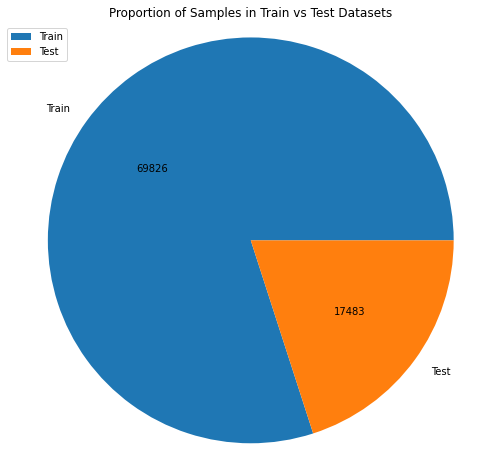

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

total_train = sum(plant_counts['train'].values())
total_test = sum(plant_counts['test'].values())

# Data preparation for plotting
labels = ['Train', 'Test']
sizes = [total_train, total_test]

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct=lambda p: '{:.0f}'.format(p * sum(sizes) / 100))
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 1), fontsize=10)
plt.title('Proportion of Samples in Train vs Test Datasets')
# Display numbers on the pie chart

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [9]:
def build_data_dict(base_path):
    data = {}
    #train_path = os.path.join(base_path, 'train')

    for disease_type in os.listdir(base_path):
        plant_name, disease_name = disease_type.split('__')
        data[plant_name] = data.get(plant_name, {})
        data[plant_name][disease_name] = len(os.listdir(os.path.join(base_path, disease_type)))

    return data
        

data_dct_for_train = build_data_dict(dataset + '/train')
data_dct_for_test = build_data_dict(dataset + '/test')
data_dct_for_train

{'Apple': {'black_rot': 501, 'healthy': 1929, 'rust': 924, 'scab': 1170},
 'Cherry': {'healthy': 724, 'powdery_mildew': 841},
 'Corn': {'common_rust': 1046,
  'gray_leaf_spot': 1864,
  'healthy': 1092,
  'northern_leaf_blight': 1770,
  'streak_virus': 772},
 'Cucumber': {'diseased': 280, 'healthy': 272},
 'Grape': {'black_measles': 1111,
  'black_rot': 9218,
  'healthy': 552,
  'leaf_blight_(isariopsis_leaf_spot)': 716},
 'Peach': {'bacterial_spot': 1842, 'healthy': 780},
 'Pepper_bell': {'bacterial_spot': 1060, 'healthy': 1488},
 'Potato': {'early_blight': 1142, 'healthy': 126, 'late_blight': 1072},
 'Rice': {'brown_spot': 522,
  'healthy': 1190,
  'hispa': 452,
  'leaf_blast': 784,
  'neck_blast': 800},
 'Soybean': {'bacterial_blight': 44,
  'caterpillar': 2647,
  'diabrotica_speciosa': 1764,
  'downy_mildew': 40,
  'healthy': 5011,
  'powdery_mildew': 61,
  'rust': 52,
  'southern_blight': 49},
 'Strawberry': {'healthy': 758, '_leaf_scorch': 892},
 'Sugarcane': {'bacterial_blight': 

c:\Users\90533\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\core.py:807: UserWarning: The label '_leaf_scorch' of <BarContainer object of 15 artists> starts with '_'. It is thus excluded from the legend.
  ax.legend(handles, labels, loc="best", title=title)


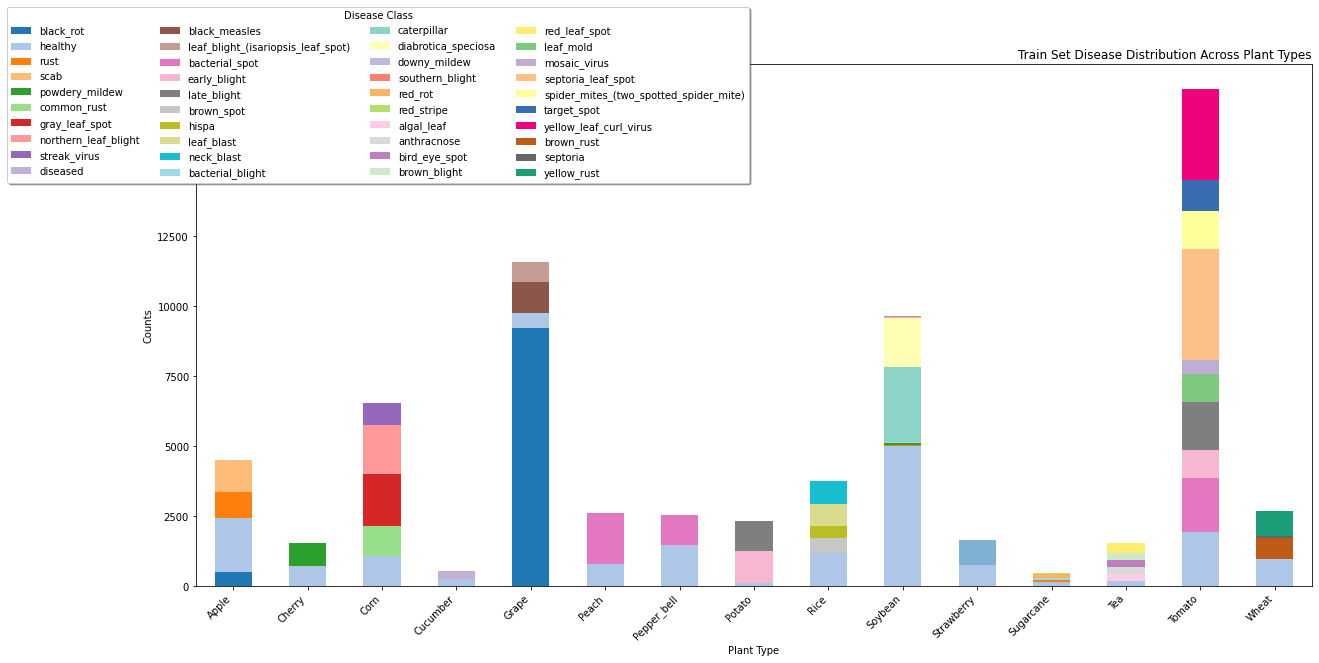

In [11]:
# for a distinctive color palette
color_palette = plt.cm.tab20(np.linspace(0, 1, 20)).tolist() + \
                plt.cm.Set3(np.linspace(0, 1, 12)).tolist() + \
                plt.cm.Accent(np.linspace(0, 1, 8)).tolist() + \
                plt.cm.Dark2(np.linspace(0, 1, 8)).tolist() + \
                plt.cm.Paired(np.linspace(0, 1, 12)).tolist() + \
                plt.cm.Pastel1(np.linspace(0, 1, 9)).tolist() + \
                plt.cm.Pastel2(np.linspace(0, 1, 8)).tolist() + \
                plt.cm.Set1(np.linspace(0, 1, 9)).tolist() + \
                plt.cm.Set2(np.linspace(0, 1, 8)).tolist()

# Now trim the color list to the number of categories you have
df = pd.DataFrame(data_dct_for_train).T
color_palette = color_palette[:len(df.columns)]

# Plot with customizations
fig, ax = plt.subplots(figsize=(20, 10))

df.plot(kind='bar', stacked=True, color=color_palette, ax=ax)

# Move the legend to the top of the plot and display it horizontally
ax.legend(title='Disease Class', bbox_to_anchor=(0.5, 1.12), loc='best', ncol=4, fancybox=True, shadow=True)
ax.set_title('Train Set Disease Distribution Across Plant Types', loc='right', fontsize=12)


# Improve the layout to accommodate the legend without overlapping the plot
plt.subplots_adjust(top=0.85)

# Customizations for better readability
plt.xlabel('Plant Type')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')

plt.show()

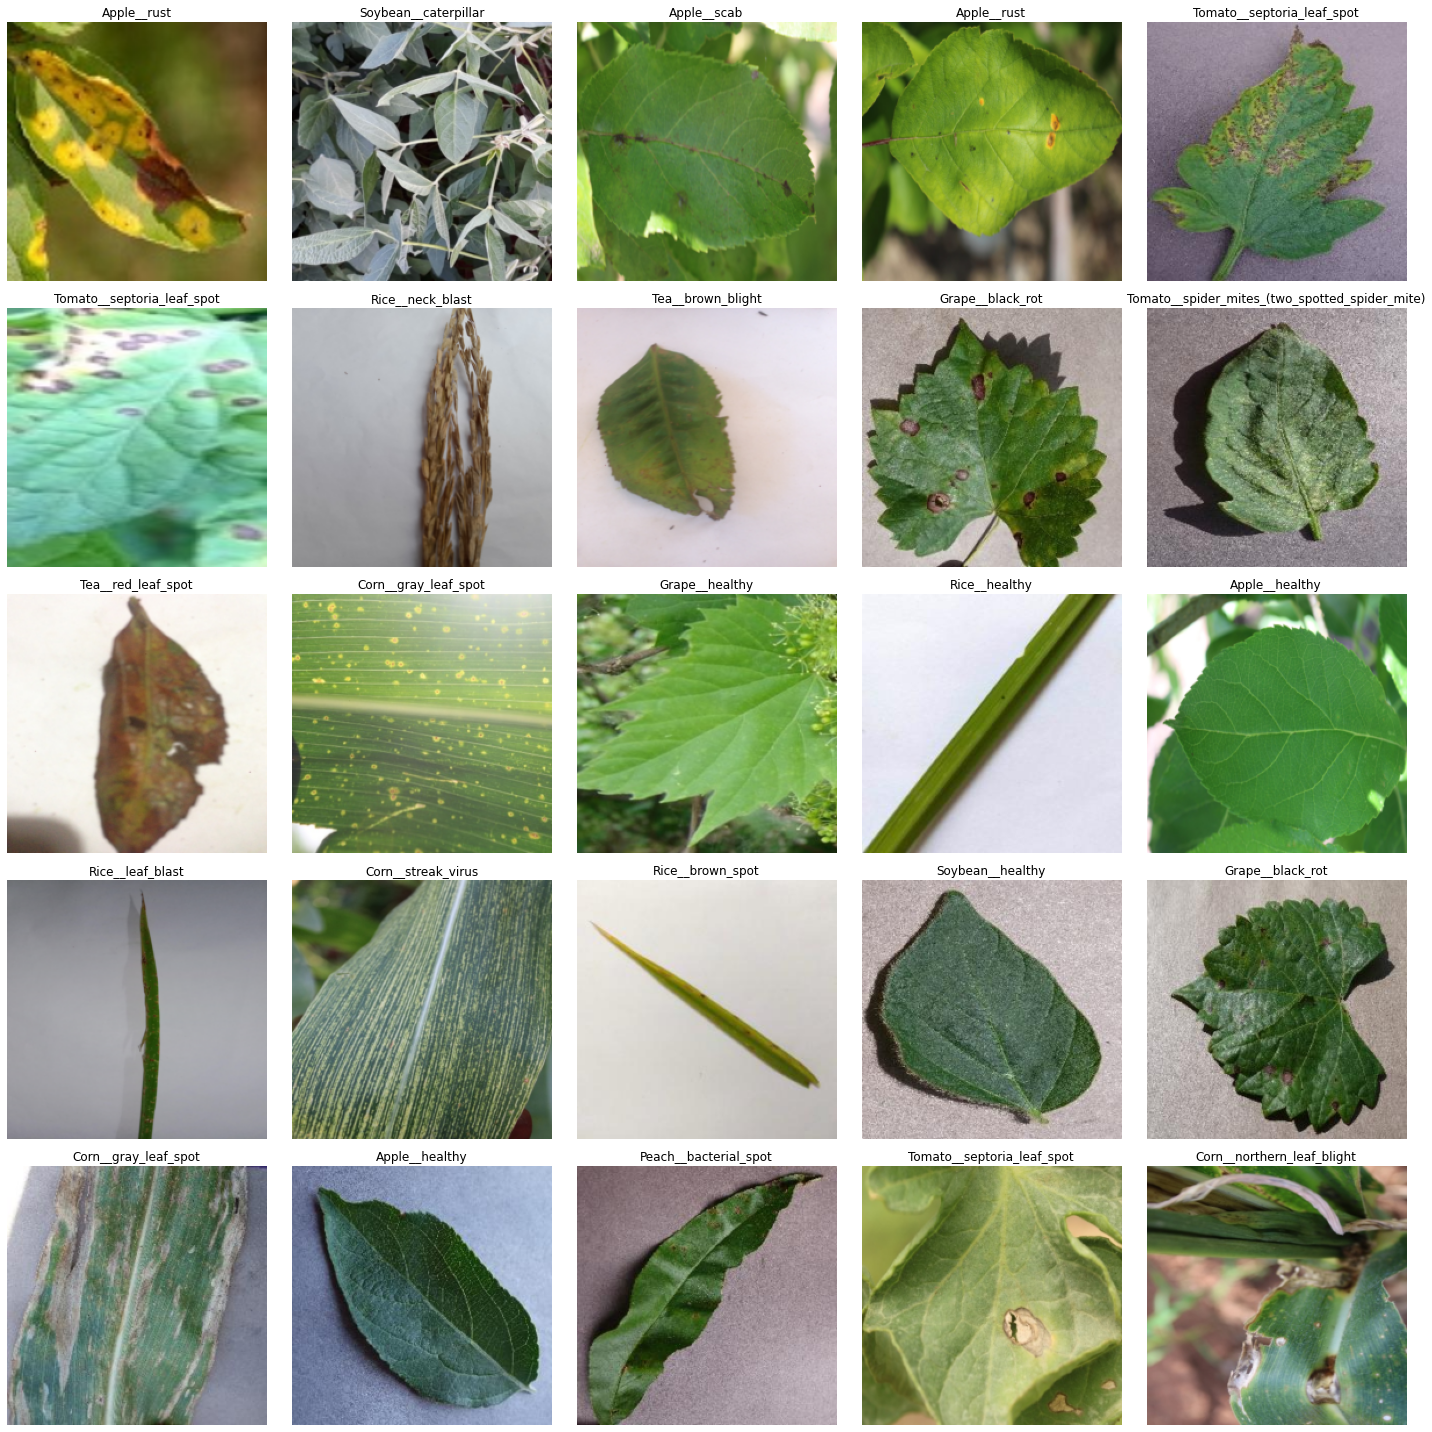

In [51]:
from PIL import Image
import random

dataset_path = dataset + '/train'
image_paths = [os.path.join(dp, f) for dp, dn, filenames in os.walk(dataset_path) for f in filenames if os.path.splitext(f)[1].lower() in ['.png', '.jpg', '.jpeg', '.bmp']]

# Randomly select 25 image paths
selected_image_paths = random.sample(image_paths, 25)

# Set up the matplotlib figure and axes
fig, axes = plt.subplots(5, 5, figsize=(20, 20))
axes = axes.ravel()

for i, img_path in enumerate(selected_image_paths):
    # Open and display the image
    image = Image.open(img_path)
    axes[i].imshow(image)
    axes[i].axis('off')  # Don't show axes for images
    
    class_name = os.path.basename(os.path.dirname(img_path))
    axes[i].set_title(class_name)

# Adjust layout
plt.tight_layout()
plt.show()